This tutorial is for the calibration of an Xpad_flat on the Soleil Diffabs Diffractometer.

The calibration data is a scan on the delta motor with a CeO2 calibrant.

In [1]:
%matplotlib nbagg

# first the imports
from typing import Iterator, List, NamedTuple, Text, Tuple

import os
import functools

from collections import namedtuple
from math import pi

import numpy
import pylab
import pyFAI

from h5py import Dataset, File

from pyFAI.gui import jupyter

# local import
from soleil import *

In [2]:
# temporary until the ruch is ON
ROOT = os.path.join("/home", "experiences", "instrumentation", "picca", "data", "99160066", "2016", "Run2")
PUBLISHED = os.path.join("/home", "experiences", "instrumentation", "picca", "data", "99160066", "published-data")

In [3]:
# do a calibration with a well centered sample.

# TODO recuperer le point de départ à partir des ponis de référence.
# TODO ajouter le diagramme complet à la fin.
# TODO ajout du mask pour la calibration

json = os.path.join(PUBLISHED, "calibration", "calibration.json")

distance = Length(3.606331e-01)
poni1 = Length(1.314012e-01)
poni2 = Length(3.613907e-02)
rot1 = Angle(0)
rot2_scale = pi / 180.0  # convert degree to radian
rot2_offset = Angle(0.328063469162)  # radian
rot3 = Angle(7.19961198098e-07)

functions = (CalibrationFunctions("dist",
                                  "poni1",
                                  "poni2",
                                  "rot1",
                                  "rot2_scale * delta + rot2_offset",
                                  "rot3"),
             [ Parameter[Length]("dist", distance, (distance, distance)),
               Parameter[Length]("poni1", poni1, (poni1, poni1)),
               Parameter[Length]("poni2", poni2, (poni2, poni2)),
               Parameter[Angle]("rot1", rot1, (rot1, rot1)),
               Parameter[float]("rot2_scale", rot2_scale, (rot2_scale, rot2_scale)),
               Parameter[Angle]("rot2_offset", rot2_offset, (rot2_offset-0.5, rot2_offset+0.5)),
               Parameter[Angle]("rot3", rot3, (rot3, rot3))
            ]
           )

params = Calibration(os.path.join(PUBLISHED, "calibration"),
                     os.path.join(PUBLISHED, "calibration", "XRD18keV_26.nxs"),
                     DatasetPathWithAttribute("interpretation", b"image"),
                     DatasetPathContains("scan_data/actuator_1_1"),
                     [0, 3, 6],
                     Calibrant("CeO2"),
                     Detector("Xpad_flat"),
                     Wavelength(6.8877e-11),
                     functions             
                    )

In [4]:
# save all the ref as images in order to do the calibration with
# pyFAI-calib[2].
# temporary until pyFAI-calib2 can read from NeXuS files.

save_as_edf(params)

cd /home/experiences/instrumentation/picca/data/99160066/published-data/calibration && pyFAI-calib -w 0.68877 --calibrant CeO2 -D Xpad_flat XRD18keV_26.nxs_00.edf
cd /home/experiences/instrumentation/picca/data/99160066/published-data/calibration && pyFAI-calib -w 0.68877 --calibrant CeO2 -D Xpad_flat XRD18keV_26.nxs_03.edf
cd /home/experiences/instrumentation/picca/data/99160066/published-data/calibration && pyFAI-calib -w 0.68877 --calibrant CeO2 -D Xpad_flat XRD18keV_26.nxs_06.edf


Empty refinement object:
GoniometerRefinement with 0 geometries labeled: .
Detector Xpad S540 flat	 PixelSize= 1.300e-04, 1.300e-04 m
Wavelength= 6.887700e-11m
SampleDetDist= 3.606331e-01m	PONI= 1.314012e-01, 3.613907e-02m	rot1=0.003799  rot2= 0.083702  rot3= 0.000002 rad
DirectBeamDist= 361.903mm	Center: x=267.454, y=1243.521 pix	Tilt=4.801 deg  tiltPlanRotation= 92.593 deg
Detector Xpad S540 flat	 PixelSize= 1.300e-04, 1.300e-04 m
Wavelength= 6.887700e-11m
SampleDetDist= 3.589892e-01m	PONI= 1.333906e-01, 3.594886e-02m	rot1=0.003080  rot2= 0.129149  rot3= -0.000007 rad
DirectBeamDist= 362.006mm	Center: x=268.025, y=1384.717 pix	Tilt=7.402 deg  tiltPlanRotation= 91.359 deg
Detector Xpad S540 flat	 PixelSize= 1.300e-04, 1.300e-04 m
Wavelength= 6.887700e-11m
SampleDetDist= 3.574238e-01m	PONI= 1.370799e-01, 3.642912e-02m	rot1=0.004178  rot2= 0.170193  rot3= -0.000000 rad
DirectBeamDist= 362.667mm	Center: x=268.738, y=1526.967 pix	Tilt=9.754 deg  tiltPlanRotation= 91.393 deg
Filled refinem

<IPython.core.display.Javascript object>


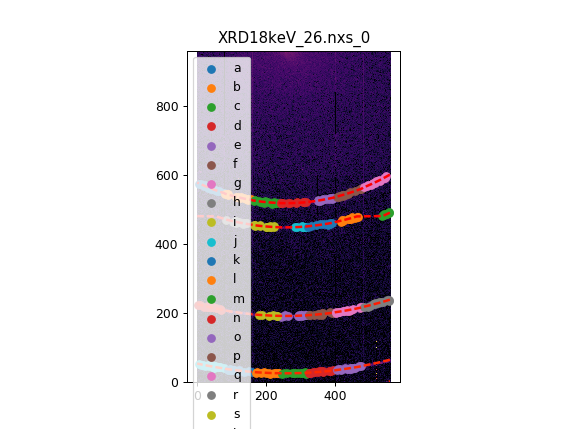

<IPython.core.display.Javascript object>


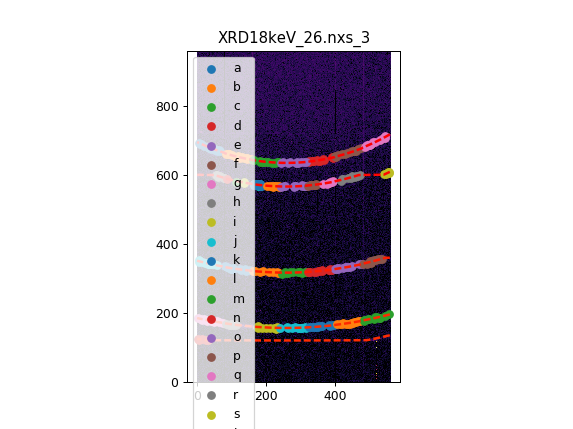

<IPython.core.display.Javascript object>


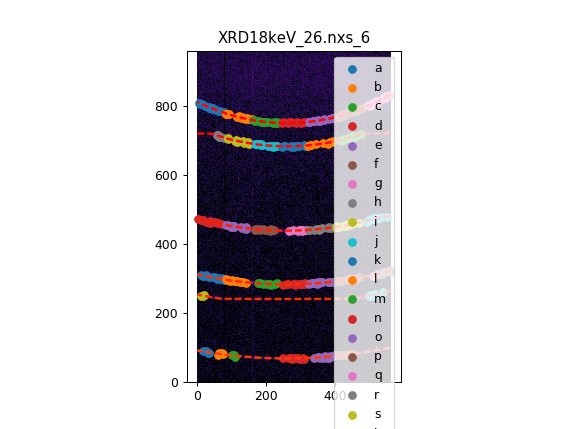

Cost function before refinement: 8.04853693115e-07
     fun: 8.0485369311488844e-07
     jac: array([  8.10347363e-05,   2.36366558e-05,   7.68475067e-04,
        -2.90910574e-04,   3.34152097e-04,  -1.19792247e-08,
        -7.10542736e-14,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([  3.60633100e-01,   1.31401200e-01,   3.61390700e-02,
         0.00000000e+00,   1.74532925e-02,   3.28063469e-01,
         7.19961198e-07])
Cost function after refinement: 8.04853693115e-07
GonioParam(dist=0.36063309999999998, poni1=0.1314012, poni2=0.036139070000000002, rot1=0.0, rot2_scale=0.017453292519943295, rot2_offset=0.32806346916200002, rot3=7.1996119809799997e-07)


XRD18keV_26.nxs_1
ControlPoints instance containing 5 group of point:
CeO2 Calibrant with 41 reflections at wavelength 6.8877e-11
Containing 5 groups of points:
#ak ring 0: 57 points
#al ring 1: 49 points
#am ring 2: 34 points
#an

<IPython.core.display.Javascript object>


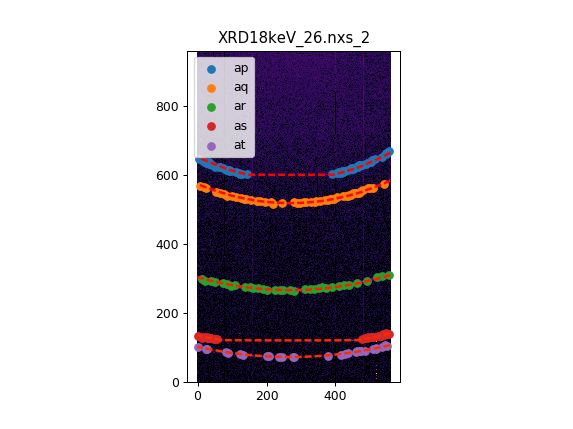

<IPython.core.display.Javascript object>


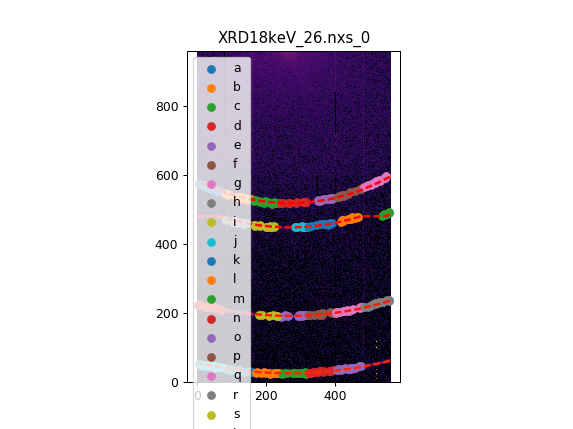

<IPython.core.display.Javascript object>


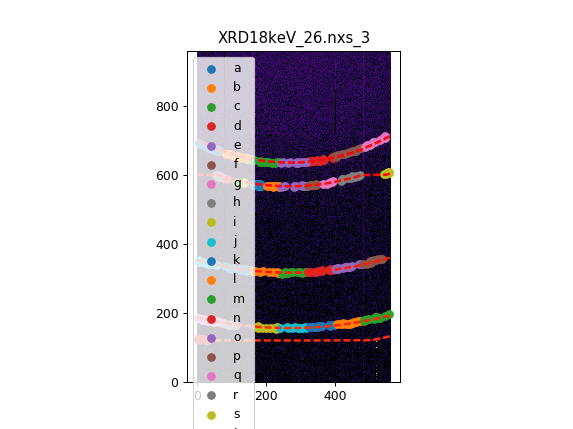

<IPython.core.display.Javascript object>


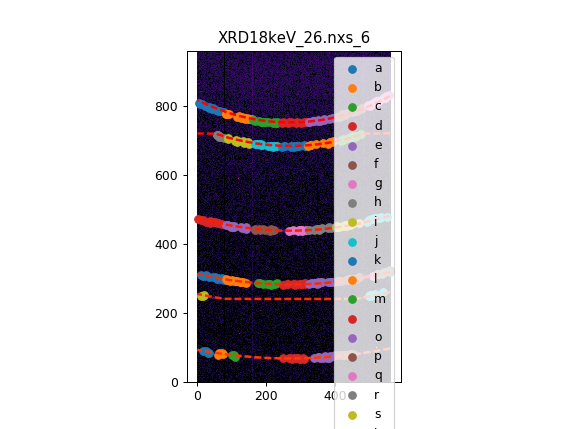

<IPython.core.display.Javascript object>


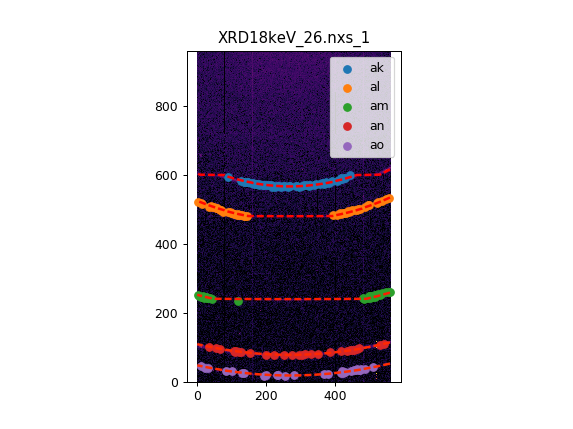

<IPython.core.display.Javascript object>


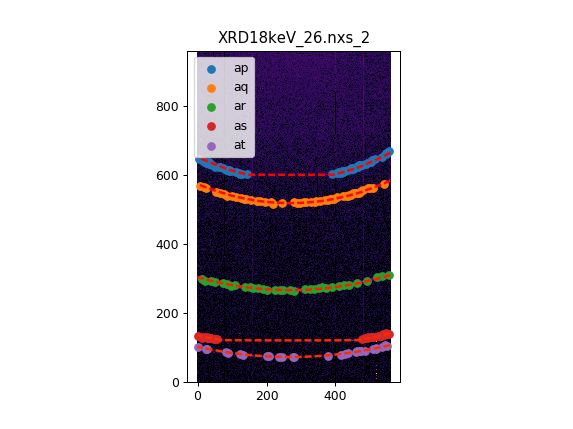

In [5]:
# execute the calibration

calibration(json, params, range(3))

<IPython.core.display.Javascript object>


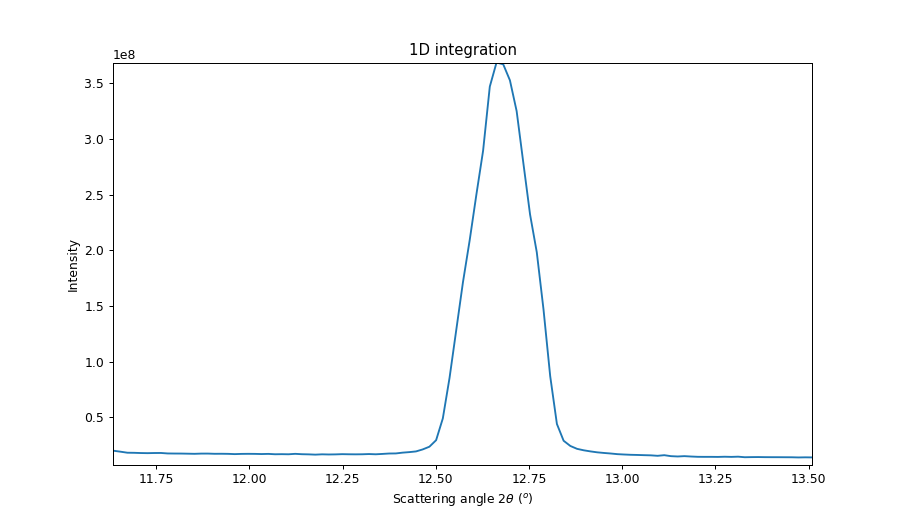

In [4]:
# plot the full diffractogram

def f(img: ndarray) -> ndarray:
    img = numpy.where(img > 2000, 0, img)
    return img

integrate(json, params, f)